In [ ]:
import tensorflow as tf

In [ ]:
# See what datasets are available?
import tensorflow_datasets as tfds
print ("Number of datasets: ", len(tfds.list_builders()))
tfds.list_builders()

Number of datasets:  155


['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'arc',
 'bair_robot_pushing_small',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'cos_e',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'eraser_multi_rc',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flic',
 'flores',
 'food101',
 'gap',
 'gigaword',
 'glue',
 'gr

In [ ]:
# Load the training/testing datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
# Check how many data points are loaded?
print("x_train dimensions : ",x_train.shape)
print("x_test dimensions  : ",x_test.shape)
print("y_train dimensions : ",y_train.shape)
print("y_test dimensions  : ",y_test.shape)

x_train dimensions :  (50000, 32, 32, 3)
x_test dimensions  :  (10000, 32, 32, 3)
y_train dimensions :  (50000, 1)
y_test dimensions  :  (10000, 1)


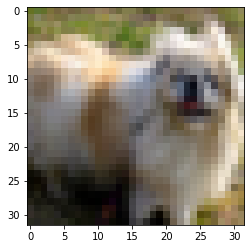

In [ ]:
# print one sample data point
import matplotlib.pyplot as plt
plt.imshow(x_train[40])
#plt.imshow(x_test[10])

In [ ]:
# Splitting training data into train and validation sets
from sklearn.model_selection import train_test_split 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.05, random_state = 0)

In [ ]:
# Image augumentatiion with Keras image generator class
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
  rotation_range = 15,
  width_shift_range = 0.1,
  height_shift_range = 0.1,
  horizontal_flip = True, )

In [ ]:
# Function for scaling data
def normalize(data):
    data = data.astype("float32")
    data = data/255.0
    return data

In [ ]:
# Scale and agument train/test datasets
x_train = normalize(x_train)
datagen.fit(x_train)
x_val = normalize(x_val)
datagen.fit(x_val)
x_test = normalize(x_test)

In [ ]:
# Treat categorical columns
y_train = tf.keras.utils.to_categorical(y_train , 10)
y_test  = tf.keras.utils.to_categorical(y_test , 10)
y_val = tf.keras.utils.to_categorical(y_val , 10)

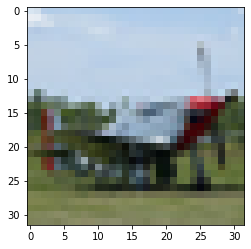

In [ ]:
# Display the modified image for fun
plt.imshow(x_train[40])

In [ ]:
# print the dimensions after the data preprocessing
print("x_train dimensions : ",x_train.shape)
print("y_train dimensions : ",y_train.shape)
print("x_test dimensions  : ",x_test.shape)
print("y_test dimensions  : ",y_test.shape)
print("x_val dimensions   : ",x_val.shape)
print("y_val dimensions   : ",y_val.shape)

x_train dimensions :  (47500, 32, 32, 3)
y_train dimensions :  (47500, 10)
x_test dimensions  :  (10000, 32, 32, 3)
y_test dimensions  :  (10000, 10)
x_val dimensions   :  (2500, 32, 32, 3)
y_val dimensions   :  (2500, 10)


In [ ]:
# Train, evaluate and print metrics
def results(model):
  epoch = 20
  r = model.fit(datagen.flow(x_train, y_train, batch_size = 32), epochs = epoch, steps_per_epoch=len(x_train)/32, validation_data = (x_val, y_val), verbose = 1)
  acc = model.evaluate(x_test , y_test)
  print("test set loss : " , acc[0])
  print("test set accuracy :", acc[1]*100)

  # Plot training and validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, r.history['accuracy'])
  plt.plot(epoch_range, r.history['val_accuracy'])
  plt.title('Classification Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range,r.history['loss'])
  plt.plot(epoch_range, r.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()

In [ ]:
# Predict the class in a given image
from tensorflow.keras.preprocessing.image import load_img , img_to_array

# setup class names array
classes = ['airplane' ,'automobile', 'bird' , 'cat' , 'deer' ,'dog' ,'frog', 'horse' ,'ship' ,'truck']
def predict_class(filename , model):

  # load and display image
  img = load_img(filename, target_size=(32, 32))
  plt.imshow(img)

  # convert to array
  # reshape into a single sample with 3 channels
  img = img_to_array(img)
  img = img.reshape(1,32,32,3)

  # prepare pixel data
  img = img.astype('float32')
  img = img/255.0

  # predicting the results
  result = model.predict(img)

  # copy predictions to dictionary
  dict2 = {}
  for i in range(10):
      dict2[result[0][i]] = classes[i]

  # sort on predictions
  res = result[0]
  res.sort()

  # pick up top 3 predictions
  res = res[::-1]
  results = res[:3]

  print("Top predictions of this images are")
  for i in range(3):
      print("{} : {}".format(dict2[results[i]] , (results[i]*100).round(2)))

  print('The image given as input is')

# First Model : Simple model with 2 convolution layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, 
                  MaxPooling2D, Flatten, BatchNormalization

# define model
model_1 = Sequential([
      Conv2D(32, (3, 3), activation = 'relu', padding = 'same', 
             input_shape = (32, 32, 3)),
      Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
      MaxPooling2D((2, 2)),
      Flatten(),
      Dense(128, activation = 'relu'),
      Dense(10, activation = 'softmax')           
])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,060,138
Trainable params: 1,060,138
Non-trainable params: 0
______________________________________________

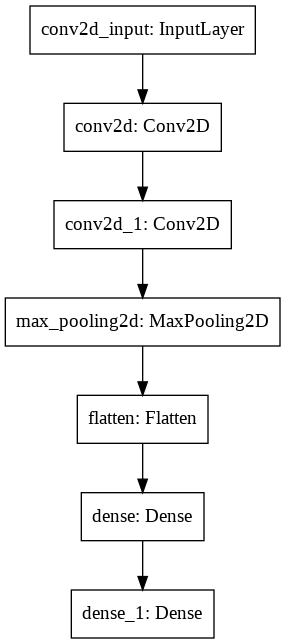

In [ ]:
# network plot
from tensorflow.keras.utils import plot_model
plot_model(model_1, to_file = 'model1.png')

In [ ]:
# compile
opt = tf.keras.optimizers.SGD(lr = 0.001, momentum = 0.9)
model_1.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

Epoch 1/20
1485/1484 [==============================] - 36s 24ms/step - loss: 1.9170 - accuracy: 0.3123 - val_loss: 1.6527 - val_accuracy: 0.4040
Epoch 2/20
1485/1484 [==============================] - 36s 24ms/step - loss: 1.5931 - accuracy: 0.4298 - val_loss: 1.4288 - val_accuracy: 0.4840
Epoch 3/20
1485/1484 [==============================] - 35s 24ms/step - loss: 1.4400 - accuracy: 0.4846 - val_loss: 1.2472 - val_accuracy: 0.5588
Epoch 4/20
1485/1484 [==============================] - 35s 23ms/step - loss: 1.3566 - accuracy: 0.5194 - val_loss: 1.2013 - val_accuracy: 0.5696
Epoch 5/20
1485/1484 [==============================] - 35s 23ms/step - loss: 1.2878 - accuracy: 0.5419 - val_loss: 1.1528 - val_accuracy: 0.5884
Epoch 6/20
1485/1484 [==============================] - 35s 24ms/step - loss: 1.2317 - accuracy: 0.5633 - val_loss: 1.1094 - val_accuracy: 0.6000
Epoch 7/20
1485/1484 [==============================] - 35s 24ms/step - loss: 1.1825 - accuracy: 0.5810 - val_loss: 1.0777 -

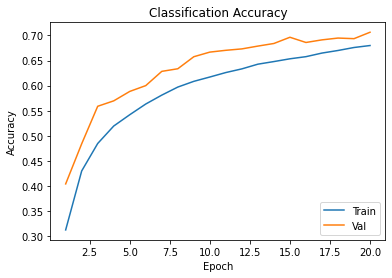

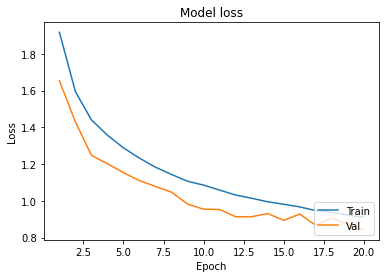

In [ ]:
# train, evaluate, display metrics
results(model_1)

Top predictions of this images are
airplane : 42.71
dog : 18.79
cat : 16.35
The image given as input is


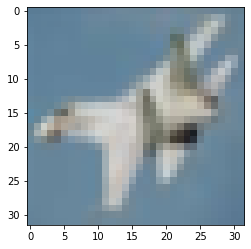

In [ ]:
# predict on unseen image
import urllib
resource = urllib.request.urlopen("https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch03/test01.png")
output = open("file01.jpg", "wb")
output.write(resource.read())
output.close()
predict_class("file01.jpg", model_1)

# Second Model : with 4 Convolution layers

In [ ]:
# define model
model_2 = Sequential([
  Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)),
  Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
  MaxPooling2D((2, 2)),
  Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
  Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
  MaxPooling2D((2, 2)),
  Flatten(),
  Dense(128, activation = 'relu'),
  Dense(10, activation = 'softmax')
])

opt = tf.keras.optimizers.SGD(lr = 0.001, momentum = 0.9)
model_2.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

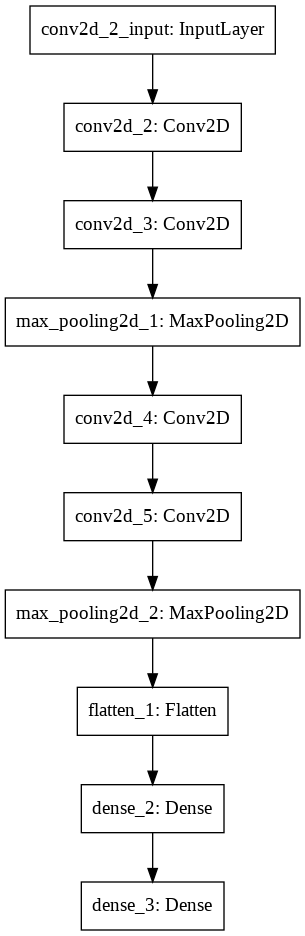

In [ ]:
plot_model(model_2 , to_file='model2.png')

Epoch 1/20
1485/1484 [==============================] - 38s 25ms/step - loss: 1.9959 - accuracy: 0.2752 - val_loss: 1.6778 - val_accuracy: 0.4072
Epoch 2/20
1485/1484 [==============================] - 37s 25ms/step - loss: 1.6477 - accuracy: 0.4065 - val_loss: 1.4663 - val_accuracy: 0.4672
Epoch 3/20
1485/1484 [==============================] - 38s 25ms/step - loss: 1.4857 - accuracy: 0.4627 - val_loss: 1.3166 - val_accuracy: 0.5212
Epoch 4/20
1485/1484 [==============================] - 37s 25ms/step - loss: 1.4007 - accuracy: 0.4958 - val_loss: 1.2289 - val_accuracy: 0.5620
Epoch 5/20
1485/1484 [==============================] - 38s 25ms/step - loss: 1.3244 - accuracy: 0.5245 - val_loss: 1.2054 - val_accuracy: 0.5632
Epoch 6/20
1485/1484 [==============================] - 37s 25ms/step - loss: 1.2568 - accuracy: 0.5508 - val_loss: 1.1807 - val_accuracy: 0.5840
Epoch 7/20
1485/1484 [==============================] - 37s 25ms/step - loss: 1.1990 - accuracy: 0.5685 - val_loss: 1.0513 -

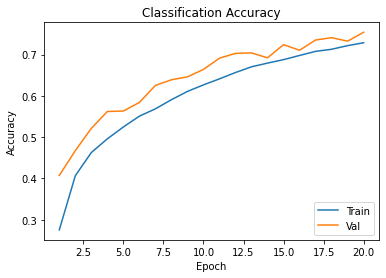

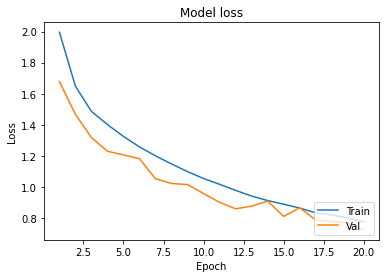

In [ ]:
# train, evaluate, display metrics
results(model_2)

Top predictions of this images are
airplane : 88.78
ship : 6.46
deer : 1.62
The image given as input is


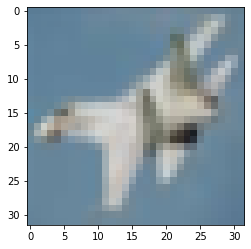

In [ ]:
# predict on earlier loaded image
predict_class("file01.jpg" ,model_2)

# Third Model : 6 convolution layers with 32 , 64 and 128 filters respectively

In [ ]:
# define model
model_3 = Sequential([
  Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)),
  Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
  MaxPooling2D((2, 2)),
  Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
  Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
  MaxPooling2D((2, 2)),
  Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
  Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
  MaxPooling2D((2, 2)),
  Flatten(),
  Dense(128, activation = 'relu'),
  Dense(10, activation = 'softmax')
])

opt = tf.keras.optimizers.SGD(lr = 0.001, momentum = 0.9)
model_3.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)        

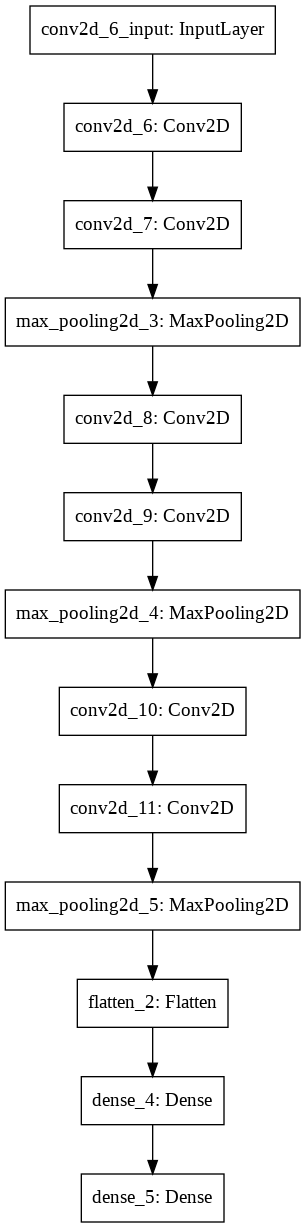

In [ ]:
plot_model(model_3 , to_file='model3.png')

Epoch 1/20
1485/1484 [==============================] - 42s 28ms/step - loss: 2.0643 - accuracy: 0.2454 - val_loss: 1.7835 - val_accuracy: 0.3632
Epoch 2/20
1485/1484 [==============================] - 41s 28ms/step - loss: 1.7025 - accuracy: 0.3881 - val_loss: 1.5314 - val_accuracy: 0.4452
Epoch 3/20
1485/1484 [==============================] - 41s 28ms/step - loss: 1.5322 - accuracy: 0.4491 - val_loss: 1.4152 - val_accuracy: 0.4992
Epoch 4/20
1485/1484 [==============================] - 41s 28ms/step - loss: 1.4213 - accuracy: 0.4905 - val_loss: 1.3069 - val_accuracy: 0.5352
Epoch 5/20
1485/1484 [==============================] - 41s 28ms/step - loss: 1.3420 - accuracy: 0.5199 - val_loss: 1.1583 - val_accuracy: 0.5788
Epoch 6/20
1485/1484 [==============================] - 41s 27ms/step - loss: 1.2630 - accuracy: 0.5506 - val_loss: 1.1281 - val_accuracy: 0.5968
Epoch 7/20
1485/1484 [==============================] - 41s 28ms/step - loss: 1.1885 - accuracy: 0.5791 - val_loss: 1.0483 -

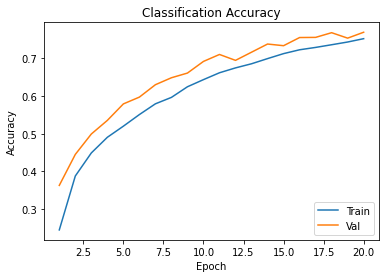

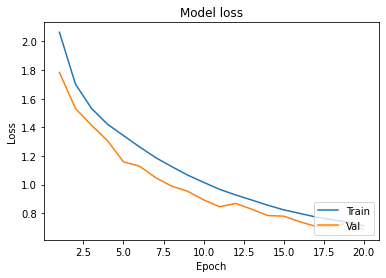

In [ ]:
results(model_3)

Top predictions of this images are
airplane : 75.91
deer : 19.73
bird : 1.7
The image given as input is


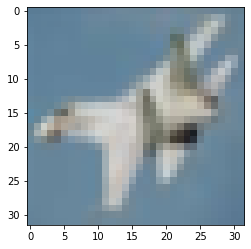

In [ ]:
predict_class("file01.jpg" ,model_3)

# Model 4 : Adding Dropouts

In [ ]:
model_4 = Sequential([
  Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (32, 32, 3)),
  Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
  MaxPooling2D((2, 2)),
  Dropout(0.2),
  Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
  Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
  MaxPooling2D((2, 2)),
  Dropout(0.2),
  Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
  Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
  MaxPooling2D((2, 2)),
  Dropout(0.3),
  Flatten(),
  Dense(128, activation = 'relu'),
  Dense(10, activation = 'softmax')
])

opt = tf.keras.optimizers.SGD(lr = 0.001, momentum = 0.9)
model_4.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)         

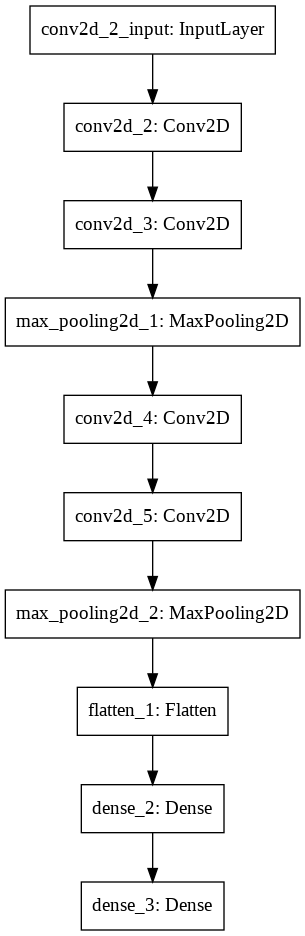

In [ ]:
plot_model(model_2 , to_file='model4.png')

Epoch 1/20
1485/1484 [==============================] - 42s 28ms/step - loss: 1.8924 - accuracy: 0.2979 - val_loss: 1.5979 - val_accuracy: 0.4252
Epoch 2/20
1485/1484 [==============================] - 42s 28ms/step - loss: 1.6053 - accuracy: 0.4038 - val_loss: 1.4043 - val_accuracy: 0.4868
Epoch 3/20
1485/1484 [==============================] - 42s 28ms/step - loss: 1.4738 - accuracy: 0.4578 - val_loss: 1.3359 - val_accuracy: 0.5308
Epoch 4/20
1485/1484 [==============================] - 42s 28ms/step - loss: 1.3701 - accuracy: 0.5026 - val_loss: 1.1700 - val_accuracy: 0.5788
Epoch 5/20
1485/1484 [==============================] - 42s 28ms/step - loss: 1.2860 - accuracy: 0.5360 - val_loss: 1.1261 - val_accuracy: 0.6132
Epoch 6/20
1485/1484 [==============================] - 41s 28ms/step - loss: 1.2265 - accuracy: 0.5590 - val_loss: 1.1320 - val_accuracy: 0.5948
Epoch 7/20
1485/1484 [==============================] - 41s 28ms/step - loss: 1.1639 - accuracy: 0.5804 - val_loss: 1.0035 -

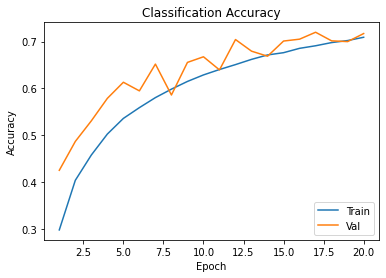

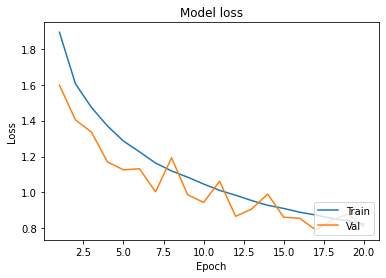

In [ ]:
results(model_4)

Top predictions of this images are
deer : 42.26
airplane : 36.77
ship : 11.42
The image given as input is


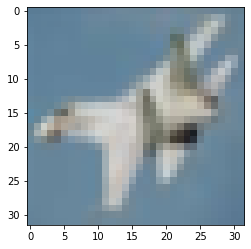

In [ ]:
predict_class("file01.jpg" ,model_4)

# Model 5 : Adding Batch Normalization and Regularization

In [ ]:
weight_decay = 1e-4
model_5 = Sequential([
  Conv2D(32, (3, 3), activation = 'relu', padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(weight_decay), input_shape = (32, 32, 3)),
  BatchNormalization(),
  Conv2D(32, (3, 3), activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay), padding = 'same'),
  BatchNormalization(),
  MaxPooling2D((2, 2)),
  Dropout(0.2),
  Conv2D(64, (3, 3), activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay), padding = 'same'),
  BatchNormalization(),
  Conv2D(64, (3, 3), activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay), padding = 'same'),
  BatchNormalization(),
  MaxPooling2D((2, 2)),
  Dropout(0.3),
  Conv2D(128, (3, 3), activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay), padding = 'same'),
  BatchNormalization(),
  Conv2D(128, (3, 3), activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay), padding = 'same'),
  BatchNormalization(),
  MaxPooling2D((2, 2)),
  Dropout(0.3),
  Flatten(),
  Dense(128, activation = 'relu'),
  Dense(10, activation = 'softmax')
])

opt = tf.keras.optimizers.SGD(lr = 0.001, momentum = 0.9)
model_5.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)       

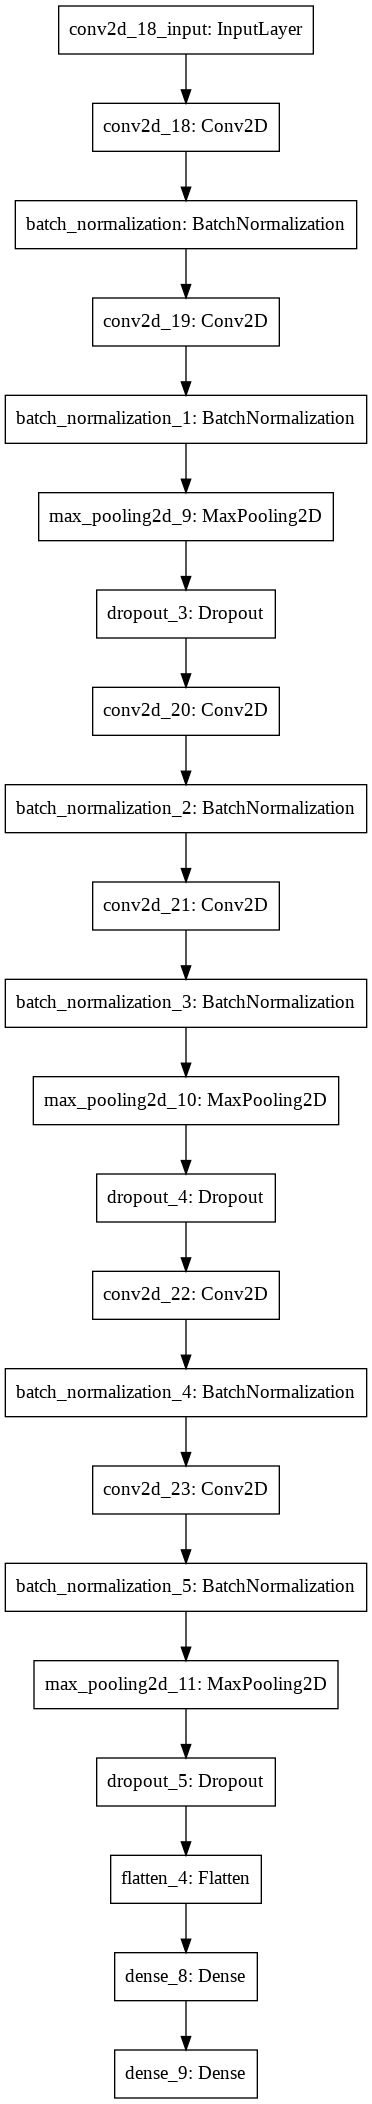

In [ ]:
plot_model(model_5 , to_file = 'model5.png')

Epoch 1/20
1485/1484 [==============================] - 45s 30ms/step - loss: 1.7018 - accuracy: 0.3952 - val_loss: 1.4641 - val_accuracy: 0.4816
Epoch 2/20
1485/1484 [==============================] - 44s 30ms/step - loss: 1.3805 - accuracy: 0.5127 - val_loss: 1.5149 - val_accuracy: 0.4860
Epoch 3/20
1485/1484 [==============================] - 44s 30ms/step - loss: 1.2402 - accuracy: 0.5655 - val_loss: 1.4133 - val_accuracy: 0.5332
Epoch 4/20
1485/1484 [==============================] - 44s 30ms/step - loss: 1.1460 - accuracy: 0.6040 - val_loss: 1.2327 - val_accuracy: 0.5860
Epoch 5/20
1485/1484 [==============================] - 44s 30ms/step - loss: 1.0707 - accuracy: 0.6283 - val_loss: 1.1109 - val_accuracy: 0.6236
Epoch 6/20
1485/1484 [==============================] - 44s 30ms/step - loss: 1.0119 - accuracy: 0.6531 - val_loss: 1.0385 - val_accuracy: 0.6588
Epoch 7/20
1485/1484 [==============================] - 44s 30ms/step - loss: 0.9627 - accuracy: 0.6707 - val_loss: 0.9605 -

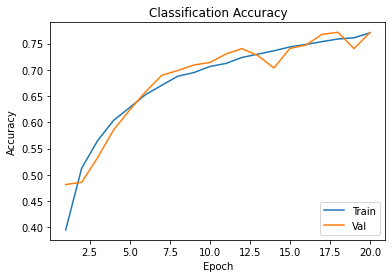

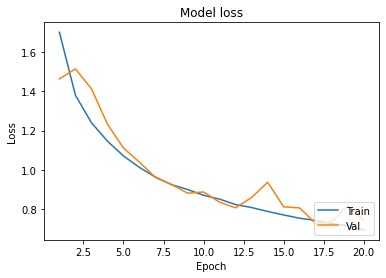

In [ ]:
results(model_5)

Top predictions of this images are
airplane : 94.02
deer : 1.95
dog : 1.37
The image given as input is


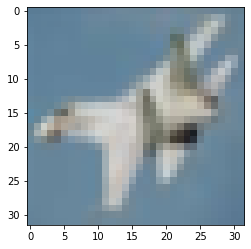

In [ ]:
predict_class("file01.jpg" ,model_5)

# Model Saving

In [ ]:
model_5.save("model_5.h5")

# Inferencing

In [ ]:
from tensorflow.keras.models import load_model
m = load_model("model_5.h5")

Top predictions of this images are
airplane : 99.29
bird : 0.43
deer : 0.16
The image given as input is


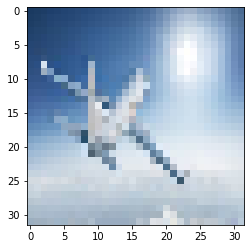

In [ ]:
# unseen image 1
resource = urllib.request.urlopen("https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch03/unknown01.png")

output = open("/content/unknown01.jpg","wb")
output.write(resource.read())
output.close()
predict_class("/content/unknown01.jpg" , m)

Top predictions of this images are
automobile : 99.97
airplane : 0.01
truck : 0.01
The image given as input is


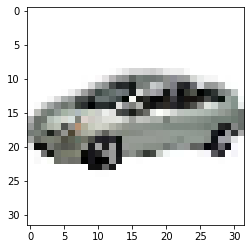

In [ ]:
# unseen image 2
resource = urllib.request.urlopen("https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch03/unknown02.png")
output = open("/content/unknown02.jpg","wb")
output.write(resource.read())
output.close()
predict_class("/content/unknown02.jpg" , m)

Top predictions of this images are
bird : 97.73
cat : 1.14
dog : 0.72
The image given as input is


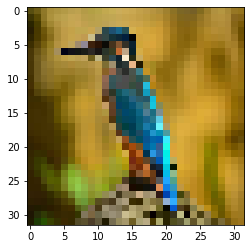

In [ ]:
# unseen image 3
resource = urllib.request.urlopen("https://raw.githubusercontent.com/Apress/Artificial-Neural-Networks-with-TensorFlow-2/master/ch03/unknown03.png")
output = open("/content/unknown03.jpg","wb")
output.write(resource.read())
output.close()
predict_class("/content/unknown03.jpg" , m)